<div class="alert alert-block alert-success">
    
## Data Science Libraries Quiz

### Instructions


1. Write code which will produce the specified result  
2. Enter that result in the green response cell when prompted
3. Write code comment(s) to describe the code


#### Note:

- Complete the work without the help of others
- Enter one code 
comment on Question 0 for 1 point 
- There are 9 questions, each worth 11 points
    - 10 points for code and answers
    - 1 point for at least one code comment on each question
- You can receive partial credit for your code





<div class="alert alert-block alert-info">

### Question 0 

- Run the following two cells
- Enter one code comment

In [116]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df = data('tips')
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [4]:
print(df.info())
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB
None


,total_bill,tip,sex,smoker,day,time,size
90,21.16,3.00,Male,No,Thur,Lunch,2
38,16.93,3.07,Female,No,Sat,Dinner,3
188,30.46,2.00,Male,Yes,Sun,Dinner,5
22,20.29,2.75,Female,No,Sat,Dinner,2
152,13.13,2.00,Male,No,Sun,Dinner,2
202,12.74,2.01,Female,Yes,Thur,Lunch,2
173,7.25,5.15,Male,Yes,Sun,Dinner,2
118,10.65,1.50,Female,No,Thur,Lunch,2
94,16.32,4.30,Female,Yes,Fri,Dinner,2
131,19.08,1.50,Male,No,Thur,Lunch,2


---

<div class="alert alert-block alert-info">
  
## Question 1
        
a) What is the highest total_bill?
    
b) What time of day did this total_bill occur? 

In [92]:
#a
max = df.total_bill.max()
max
# or
.nlargest(1)

50.81

In [15]:
#b
max_bill_info = df.sort_values(by = 'total_bill', ascending = False).head(1)
max_bill_info

# or use
df.loc


,total_bill,tip,sex,smoker,day,time,size
171,50.81,10.0,Male,Yes,Sat,Dinner,3


In [100]:
a=df[['total_bill']]
a.info()


<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [106]:
b=df['total_bill']
b.info()

<class 'pandas.core.series.Series'>
Index: 244 entries, 1 to 244
Series name: total_bill
Non-Null Count  Dtype  
--------------  -----  
244 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [109]:
c = df.total_bill
c.info

<bound method Series.info of 1      16.99
2      10.34
3      21.01
4      23.68
5      24.59
       ...  
240    29.03
241    27.18
242    22.67
243    17.82
244    18.78
Name: total_bill, Length: 244, dtype: float64>

<div class="alert alert-block alert-success">

### Question 1 Response
    
a)$50.81
    
b)Dinner


---

<div class="alert alert-block alert-info">
  
## Question 2
    
a) What values are in the smoker column?
    
b) Are the majority of tables smoking or non-smoking?

In [20]:
#a
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [111]:
#b
df.smoker.value_counts()
# for %
df.smoker.value_counts(normalize = True) 

smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64

<div class="alert alert-block alert-success">

### Question 2 Response
    
a)Boolean values(Yes / No)

b)The majority of tables are non-smoking.

---

<div class="alert alert-block alert-info">
  
## Question 3 
    
- What proportion of the bills are from the weekend (Saturday and/or Sunday)? 
    - Assume each table has one bill, regardless of table size
- Round your answer to two decimal points.

In [30]:
weekend = df['day'].isin(['Sat','Sun']).sum()
portion_weekend = round(weekend / len(df),2)
portion_weekend 
# or
df.day.str.startwith('S')
# or
df.assign

0.67

<div class="alert alert-block alert-success">

### Question 3 Response
    
- the portion for weekend bills is 0.67



---
<div class="alert alert-block alert-info">
    
## Question 4

    
-  Create a column named `percent_tip`.


- Calculate the percent_tip based on the formula below. 



> $\texttt{Percent tip} = \dfrac{\texttt{tip amount}}{\texttt{bill}}$

- What was the highest percent tip?

In [31]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [112]:
df['percent_tip'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,table_size,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [40]:
highest_percent_tip = df.sort_values(by = 'percent_tip', ascending = False).head(1)
highest_percent_tip

,total_bill,tip,sex,smoker,day,time,size,percent_tip
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


<div class="alert alert-block alert-success">

### Question 4 Response
    
- 0.71 is the higest percent_tip
   

---

<div class="alert alert-block alert-info">
    
## Question 5

    
a) Which time of day has a higher average total_bill, dinner or lunch?
    
b) What is the difference in the average bill?


In [44]:
average_total_by_time = df.groupby('time')['total_bill'].mean() #.idxmax() is the index
average_total_by_time

time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64

In [47]:
difference = average_total_by_time.Dinner - average_total_by_time.Lunch
# or
.diff()
pd.concat()

difference

3.628482620320856

<div class="alert alert-block alert-success">

### Question 5 Response
    
a) Dinner has a higher total bill.

b) $3.63 is the difference in the average bill between lunch and dinner.

---
<div class="alert alert-block alert-info">
    
## Question 6
    

- Rename the column named `size` to `table_size`
- Verify this column name replaces the former column name 
- Use your new column name to determine:
    - What is the most common table size?


In [50]:
df = df.rename(columns = {'size':'table_size'})
df

,total_bill,tip,sex,smoker,day,time,table_size,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [52]:
df.table_size.value_counts()
# or
df.table_size.mode()

table_size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

<div class="alert alert-block alert-success">

### Question 6 Response
    
- 2 is the most common table size    

---
<div class="alert alert-block alert-info">
    
## Question 7

- The following code produces errors.
    
- Correct the code to determine:
    - What is the **maximum total_bill** for dinner time on Thursday?
    

#### Incorrect code
```python
df.total_bill( (df.day == 'Thursday') and (df.time == 'dinner') ) 
```

In [75]:
# corrected code
df.total_bill[(df.day == 'Thur') & (df.time == 'Dinner')]

244    18.78
Name: total_bill, dtype: float64

<div class="alert alert-block alert-success">

### Question 7 Response

    
- There is only 1 dinner bill on Thursday, and the total_bill is $18.78
    
    

---
<div class="alert alert-block alert-info">
    
## Question 8


- What is the min, mean, and max total_bill?
- Use a **histogram** to plot the distribution of the total_bill
    - add a title
    

In [ ]:
sns.dogplot()

In [76]:
df.total_bill.min()

3.07

In [77]:
df.total_bill.mean()

19.78594262295082

In [78]:
df.total_bill.max()

50.81

In [129]:
# or
df.total_bill.agg(['min','mean','max'])
# or
df.total_bill.describe().loc[['min','mean','max']]

min      3.070000
mean    19.785943
max     50.810000
Name: total_bill, dtype: float64

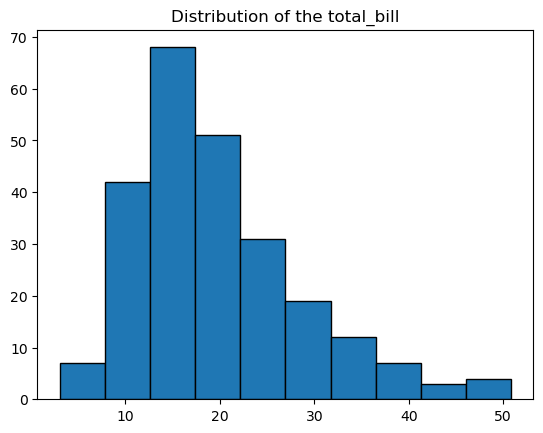

In [130]:
plt.hist(df.total_bill,edgecolor = 'k')
plt.title('Distribution of the total_bill')
plt.show()

<div class="alert alert-block alert-success">

### Question 8 Response

    
- min: $3.07
- mean:$19.79
- max: $50.81

- for histogram please see above code output

    
    

---
<div class="alert alert-block alert-info">
    
## Question 9

- Use matplotlib or seaborn to create a **scatter plot** for total_bill versus tips
    - Plot total_bill along the x-axis

- Customize the visualization in at least one way
- Add axis labels and a title

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,table_size,percent_tip
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


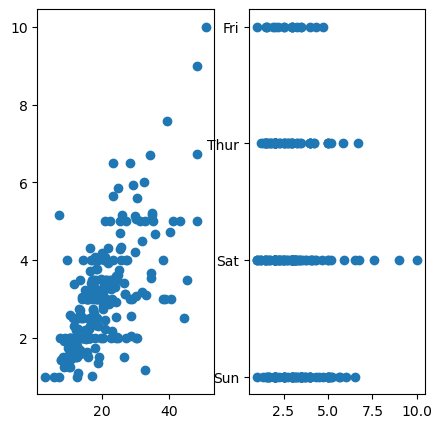

In [139]:
fig,ax = plt.subplots(1,2,figsize = (5,5))
ax[0].scatter(df.total_bill,df.tip)
ax[1].scatter(df.tip,df.day)


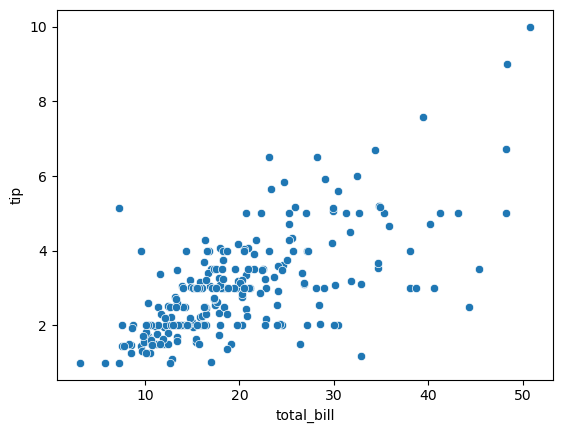

In [87]:
# scatter plot

import seaborn as sns
sns.scatterplot(data = df,x = df.total_bill, y=df.tip)
plt.show()

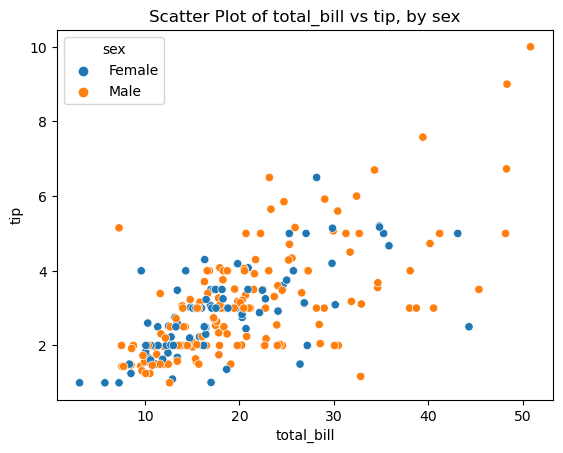

In [86]:
# cutomize: added sex as a hue

sns.scatterplot(data = df,x = df.total_bill, y=df.tip, hue = 'sex' )
plt.title('Scatter Plot of total_bill vs tip, by sex')
plt.show()


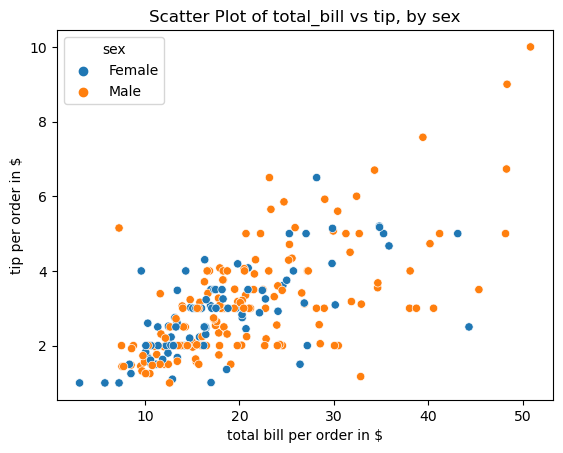

In [91]:
# Add axis labels and a title


sns.scatterplot(data = df,x = df.total_bill, y=df.tip, hue = 'sex' )
plt.xlabel('total bill per order in $')
plt.ylabel ('tip per order in $')
plt.title('Scatter Plot of total_bill vs tip, by sex')
plt.show()



